# Example 1

Below is a short example of how to use the framework using data fetched from `yfinance`.


## Imports

In [12]:
import sys
import datetime
import os

import yfinance as yf
import pandas as pd

from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv('local_path'))

## Fetching data using yfinance

In [13]:
ticker_symbol = "AAPL"

ticker = yf.Ticker(ticker_symbol)

historical_data = ticker.history(period="1y")  # data for the last year

data = historical_data.reset_index()
data.rename(columns = {'Date':'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace = True)
data.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

## Loading data using dataloader

In [14]:
from backtrader.backtesting.backtester.backtester import Backtester

In [15]:
class SimpleBacktester(Backtester):
    def __init__(self, market_data):
        super().__init__(market_data)
        
    def make_decision(self, data_point):
                
        if data_point.close > self.past_data[-1].close:
            decision = 1  # buy the whole portfolio
        elif data_point.close < self.past_data[-1].close:
            decision = -1  # sell the whole portfolio
        else:
            decision = 0  # hold
                        
        return decision


In [16]:
from backtrader.backtesting.data.data_loader import MarketData

market_data = MarketData(data)  # wrap the DataFrame properly
tester = SimpleBacktester(market_data)
results = tester.run_simulation()
print(results)

Error in decision for 2024-08-23 00:00:00-04:00. list index out of range. Holding position.
[25000.0, 25000.0, 25093.537243974122, 24924.067940762907, 24924.067940762907, 24838.383608043147, 24838.383608043147, 24838.383608043147, 24838.383608043147, 24664.141108647862, 24664.141108647862, 24574.822648375, 24574.822648375, 24586.962312792486, 24557.1638779882, 24557.1638779882, 24557.1638779882, 24998.94243445701, 25925.54051443027, 25849.646644330514, 25849.646644330514, 25849.646644330514, 25735.95582190883, 25735.95582190883, 25766.49734291695, 26355.827489475843, 25587.775776701983, 25587.775776701983, 25462.53177397136, 25462.53177397136, 24888.839964267736, 24888.839964267736, 25304.443707562517, 25249.324152528472, 25249.324152528472, 25249.324152528472, 25527.687873171857, 25301.72130091592, 25301.72130091592, 25612.338434023713, 25773.643412270903, 25706.070585710964, 25706.070585710964, 25706.070585710964, 25706.070585710964, 25927.129669147726, 25957.12291817958, 25560.55062

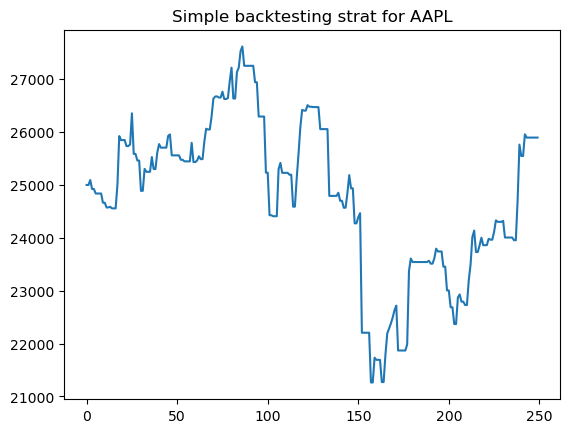

In [18]:
import matplotlib.pyplot as plt

plt.plot(results)
plt.title("Simple backtesting strat for AAPL")
plt.show()